In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from time import time
import math
import os
import types

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [3]:
from utils_spectr.PDE_Model import PDE_Model


from utils_spectr.Mesh import Mesh
from utils_spectr.NeuralNet import PINN_NeuralNet

from utils_spectr.PINN import PINN
from utils_spectr.Postprocessing import View_results

from utils_spectr.Postprocessing import View_results_X

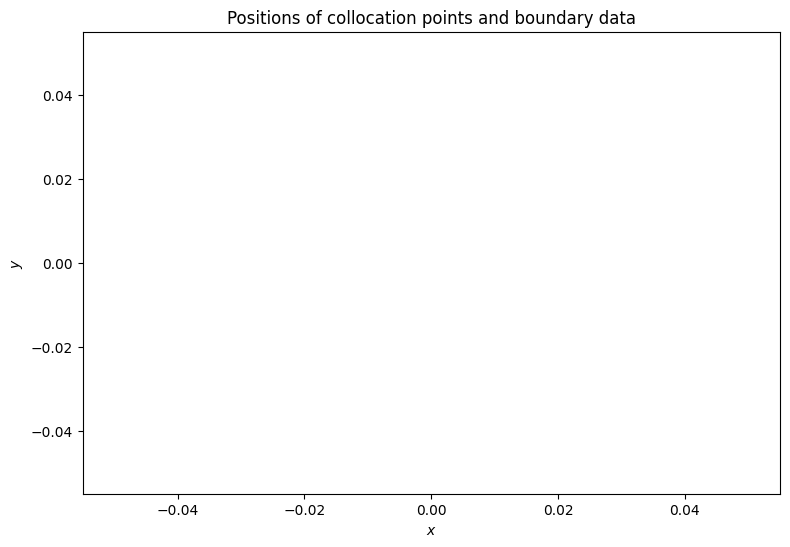

In [4]:
domain1 = ([1,30],[1,30],[1,30])
PDE1 = PDE_Model()
domain1 = PDE1.set_domain(domain1)

lb = {'type':'D', 'value':-1/(4*np.pi*1), 'fun':None, 'dr':None, 'r':1}
borders = {'1':lb}
ins_domain = {'rmax': 1}

mesh1 = Mesh(domain1, N_b=60, N_r=1500)
mesh1.create_mesh(borders, ins_domain)
mesh1.plot_points_2d();


PINN_solver = PINN()

PINN_solver.adapt_PDE(PDE1)
weights = {
        'w_r': 1,
        'w_d': 1,
        'w_n': 1,
        'w_i': 1
}
PINN_solver.adapt_mesh(mesh1,**weights)

lr = ([2500,4000],[1e-2,5e-3,5e-4])
hyperparameters = {
        'input_shape': (None,3),
        'num_hidden_layers': 8,
        'num_neurons_per_layer': 20,
        'output_dim': 1,
        'activation': 'tanh'
}

PINN_solver.create_NeuralNet(PINN_NeuralNet,lr,**hyperparameters)

In [23]:
PINN_solver.solve(N=6000)

Loss: 1.8591e-02: 100%|██████████| 6000/6000 [04:08<00:00, 24.10it/s]


Computation time: 249.01695609092712 seconds


In [24]:
Post = View_results(PINN_solver)

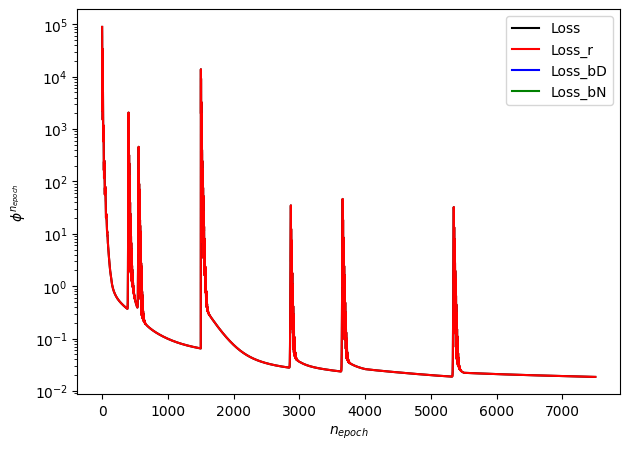

In [25]:
Post.plot_loss_history();

In [26]:
Kx = np.array(range(1,int(20)+1),dtype='float32')
Ky = np.array(range(1,int(20)+1),dtype='float32')
Kz = np.array(range(1,int(20)+1),dtype='float32')
#X, Y, Z = np.meshgrid(kx, ky, kz)



def get_uk(X):
    X1 = np.array(X, dtype='float32')
    X2 = X1.reshape((3,1))
    return Post.evaluate_u_point(X2)[0]

x = np.linspace(0,1,100)

In [27]:
sum = 0
for kx in Kx:
    print(kx)
    for ky in Ky:
        for kz in Kz:
            uk = get_uk([kx,ky,kz])
            sum += uk*np.exp(1j*kx*x)

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0


Text(0, 0.5, 'u')

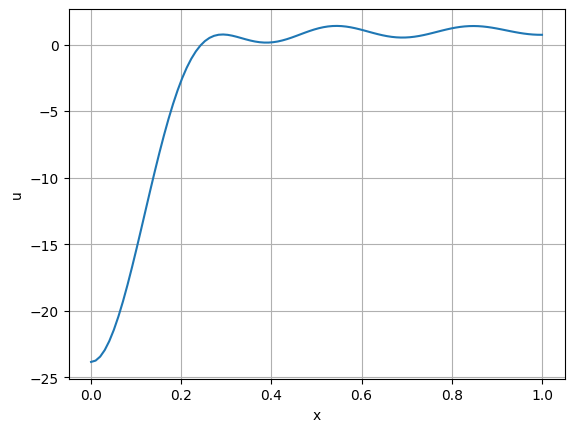

In [28]:
plt.plot(x,np.real(sum))
plt.grid()
plt.xlabel('x')
plt.ylabel('u')

Text(0, 0.5, 'u')

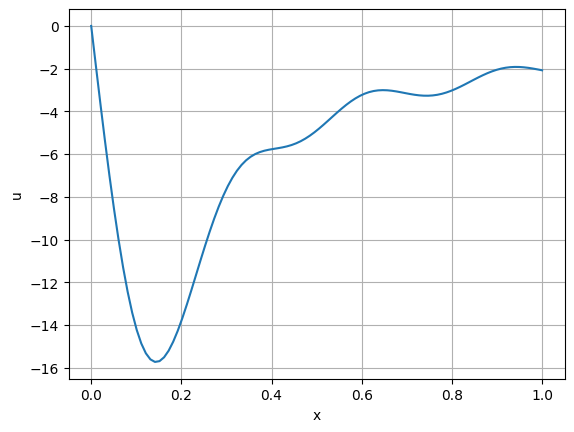

In [29]:
plt.plot(x,np.imag(sum))
plt.grid()
plt.xlabel('x')
plt.ylabel('u')

Text(0, 0.5, 'u')

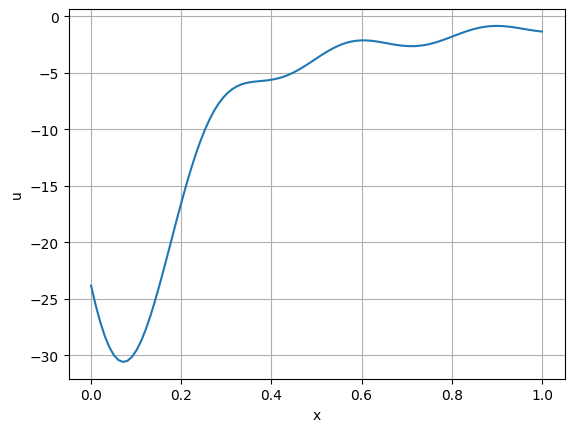

In [30]:
plt.plot(x,np.real(sum)+np.imag(sum))
plt.grid()
plt.xlabel('x')
plt.ylabel('u')